In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import pandas as pd

In [ ]:

# Aufgabe 5.2
# Calculate n', the equivalent number of independent samples,
# for the two sets of minimum air temperature in Table A1

# Ithaca Tmin
# Canadaigua Tmin


In [2]:
# A1 Daily Precipitation and Temperature (F) Observations
# at Ithaca and Canadaigua, New York, for January 1987

Tmin_Ithaca = np.array([19,25,22,-1,4,14,21,22,23,27,29,25,29,15,29,24,0,2,26,17,19,9,20,-6,-13,-13,-11,-4,-4,11,23]) 
Tmin_Canadaigua = np.array([28,28,26,19,16,24,26,24,24,29,29,27,31,26,38,23,13,14,28,19,19,17,22,2,4,5,7,8,14,14,23]) # Canandaigua T max

print(Tmin_Ithaca.shape)
print(Tmin_Canadaigua.shape)


(31,)
(31,)


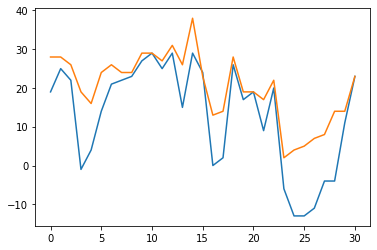

In [5]:
plt.plot(Tmin_Ithaca)
plt.plot(Tmin_Canadaigua)

0    1.000000
1    0.661614
2    0.486484
3    0.371313
4    0.385928
5    0.161263
dtype: float64
0    1.000000
1    0.643781
2    0.378864
3    0.262221
4    0.179727
5   -0.004134
dtype: float64


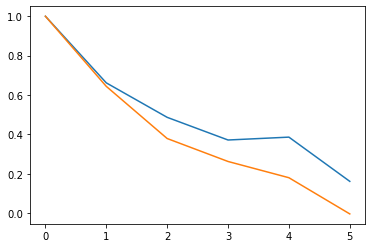

In [9]:
#np.vectorize(res.autocorr)(np.arange(0,len(res)-1))
rho_lag_cndg=pd.Series(sm.tsa.acf(Tmin_Canadaigua, nlags=5,fft=False))
rho_lag_ithc=pd.Series(sm.tsa.acf(Tmin_Ithaca, nlags=5,fft=False))

print(rho_lag_cndg)
plt.plot(rho_lag_cndg)
print(rho_lag_ithc)
plt.plot(rho_lag_ithc)

In [12]:
n_eff_itch=Tmin_Ithaca.shape[0]*(1-rho_lag_ithc[1])/(1+rho_lag_ithc[1])
n_eff_cndg=Tmin_Canadaigua.shape[0]*(1-rho_lag_cndg[1])/(1+rho_lag_cndg[1])

print('n: ',Tmin_Canadaigua.shape[0])
print('lag-1 Autocorrelation rho(1): ',rho_lag_ithc[1])
print('n_eff @ Ithaca: ',n_eff_itch)

print('n Canadaigua: ',Tmin_Canadaigua.shape[0])
print('lag-1 Autocorrelation rho(1): ',rho_lag_cndg[1])
print('n_eff @ Canadaigua: ',n_eff_cndg)


n:  31
lag-1 Autocorrelation rho(1):  0.6437814521926671
n_eff @ Ithaca:  6.717909468620163
n Canadaigua:  31
lag-1 Autocorrelation rho(1):  0.6616135738716383
n_eff @ Canadaigua:  6.313128019011704
